In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = {
    'Company': ['Microsoft', 'Microsoft', 'Microsoft', 'Tesla', 'Tesla', 'Tesla', 'Apple', 'Apple', 'Apple'],
        'Year': [2023, 2022, 2021, 2023, 2022, 2021, 2023, 2022, 2021],
            'Total_Revenue': [211915, 198270, 168088, 96773, 81462, 53823, 383285, 394328, 365817],
                'Net_Income': [72361, 72738, 61271, 14999, 12556, 5521, 96995, 99803, 94680],
                    'Total_Assets': [411976, 364840, 333779, 106618, 82338, 62131, 352583, 352755, 351002],
                        'Total_Liabilities': [205753, 183007, 183600, 43009, 36467, 30662, 290437, 302083, 287912],
                            'Cash_Flow_Operations': [87582, 89105, 76742, 13256, 14725, 11512, 110543, 122151, 104038]
                            }

df = pd.DataFrame(data)

# Convert all monetary values to billions for easier reading
cols_to_convert = ['Total_Revenue', 'Net_Income', 'Total_Assets', 'Total_Liabilities', 'Cash_Flow_Operations']
df[cols_to_convert] = df[cols_to_convert] / 1000

# Calculate growth metrics
df['Revenue_Growth'] = df.groupby('Company')['Total_Revenue'].pct_change() * 100
df['NetIncome_Growth'] = df.groupby('Company')['Net_Income'].pct_change() * 100
df['Asset_Growth'] = df.groupby('Company')['Total_Assets'].pct_change() * 100

# Calculate financial ratios
df['Profit_Margin'] = (df['Net_Income'] / df['Total_Revenue']) * 100
df['Debt_to_Equity'] = df['Total_Liabilities'] / (df['Total_Assets'] - df['Total_Liabilities'])
df['Operating_Cash_Flow_Margin'] = (df['Cash_Flow_Operations'] / df['Total_Revenue']) * 100

# Display the processed dataframe
display(df)

,Company,Year,Total_Revenue,Net_Income,Total_Assets,Total_Liabilities,Cash_Flow_Operations,Revenue_Growth,NetIncome_Growth,Asset_Growth,Profit_Margin,Debt_to_Equity,Operating_Cash_Flow_Margin
0,Microsoft,2023,211.915,72.361,411.976,205.753,87.582,NaN,NaN,NaN,34.146238,0.997721,41.328835
1,Microsoft,2022,198.270,72.738,364.840,183.007,89.105,-6.438902,0.520999,-11.441443,36.686337,1.006456,44.941242
2,Microsoft,2021,168.088,61.271,333.779,183.600,76.742,-15.222676,-15.764800,-8.513595,36.451740,1.222541,45.655847
3,Tesla,2023,96.773,14.999,106.618,43.009,13.256,NaN,NaN,NaN,15.499158,0.676146,13.698036
4,Tesla,2022,81.462,12.556,82.338,36.467,14.725,-15.821562,-16.287753,-22.772890,15.413322,0.794990,18.075913
5,Tesla,2021,53.823,5.521,62.131,30.662,11.512,-33.928703,-56.028990,-24.541524,10.257697,0.974356,21.388626
6,Apple,2023,383.285,96.995,352.583,290.437,110.543,NaN,NaN,NaN,25.306234,4.673462,28.840941
7,Apple,2022,394.328,99.803,352.755,302.083,122.151,2.881146,2.894995,0.048783,25.309641,5.961537,30.977004
8,Apple,2021,365.817,94.680,351.002,287.912,104.038,-7.230275,-5.133112,-0.496945,25.881793,4.563512,28.439903


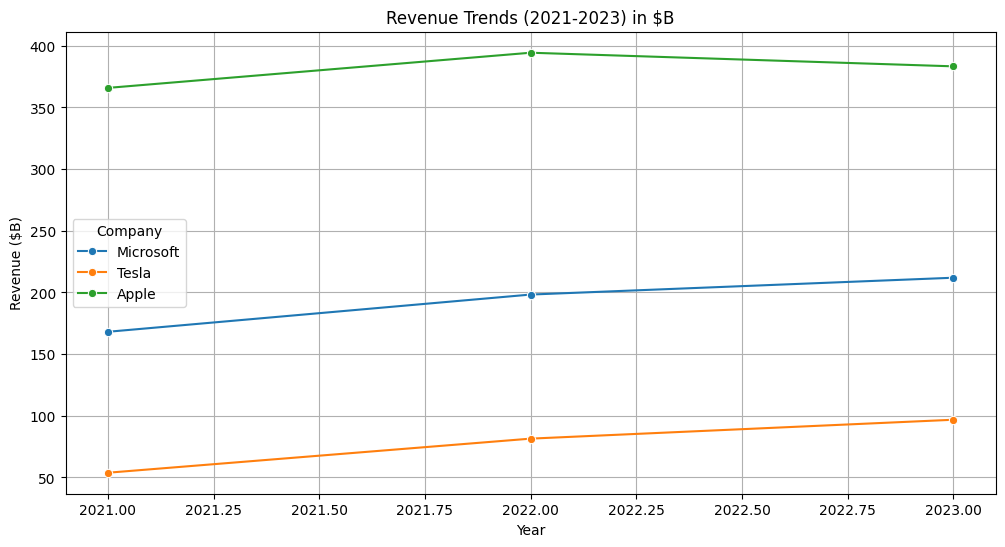

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Total_Revenue', hue='Company', marker='o')
plt.title('Revenue Trends (2021-2023) in $B')
plt.ylabel('Revenue ($B)')
plt.grid(True)
plt.show()

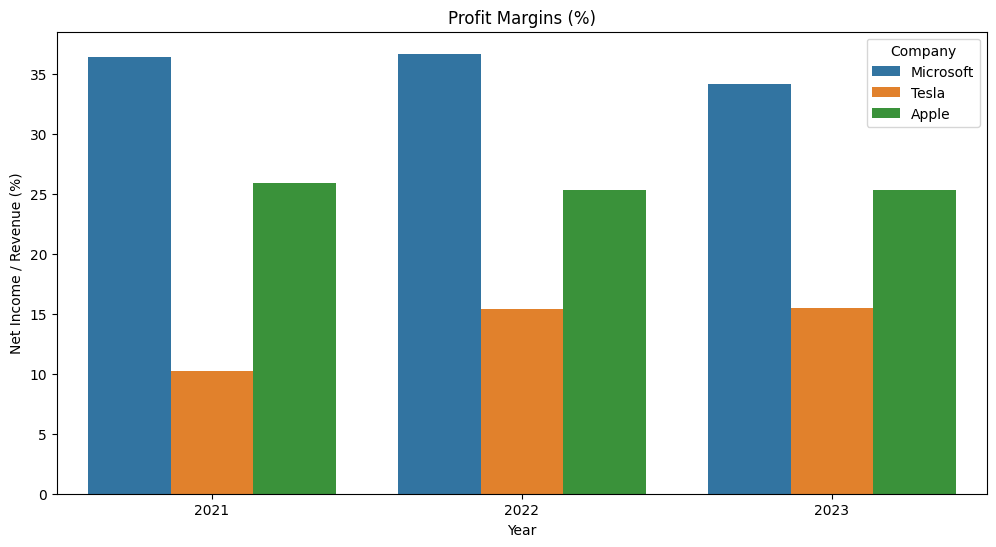

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Year', y='Profit_Margin', hue='Company')
plt.title('Profit Margins (%)')
plt.ylabel('Net Income / Revenue (%)')
plt.show()

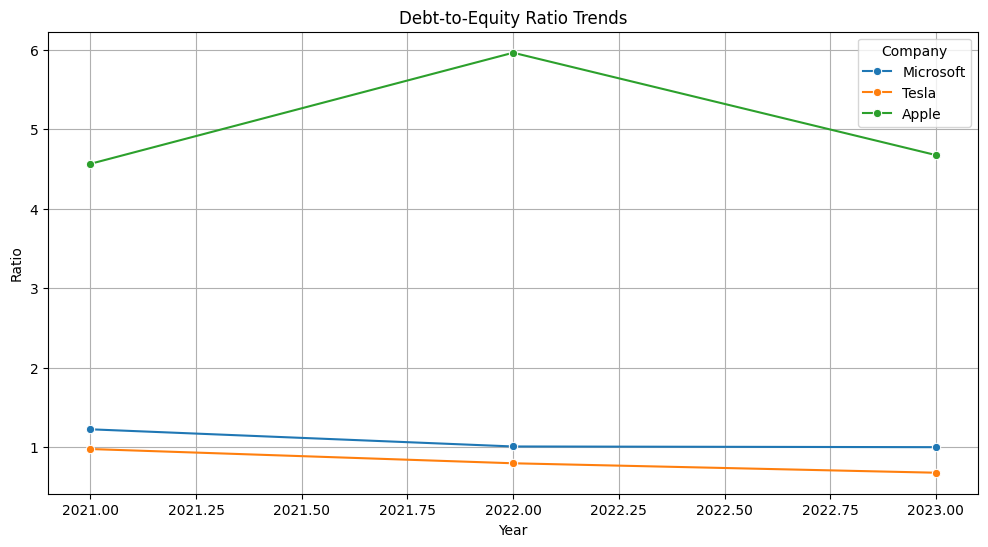

In [ ]:
# Plot debt-to-equity ratios
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Debt_to_Equity', hue='Company', marker='o')
plt.title('Debt-to-Equity Ratio Trends')
plt.ylabel('Ratio')
plt.grid(True)
plt.show()

In [ ]:
# Example scoring algorithm
df['Financial_Health_Score'] = (
    df['Profit_Margin'] * 0.4 +
        (100 - df['Debt_to_Equity'] * 10) * 0.3 +
            df['Operating_Cash_Flow_Margin'] * 0.3
            )

In [ ]:
def generate_revenue_analysis(row):
      change = row['Revenue_Growth']
      if change > 20:
         trend = "strong growth"
      elif change > 5:
         trend = "steady growth"
      else:
         trend = "declining" if change < 0 else "stable"
      return f"{row['Company']} reported ${row['Total_Revenue']:.1f}B revenue in {row['Year']} ({trend})"

In [ ]:
# Import required libraries
import pandas as pd

# Load analyzed financial data from Task 1
financial_data = pd.DataFrame({
    'Company': ['Microsoft', 'Microsoft', 'Microsoft', 'Tesla', 'Tesla', 'Tesla', 'Apple', 'Apple', 'Apple'],
        'Year': [2023, 2022, 2021, 2023, 2022, 2021, 2023, 2022, 2021],
            'Total_Revenue': [211.915, 198.270, 168.088, 96.773, 81.462, 53.823, 383.285, 394.328, 365.817],
                'Net_Income': [72.361, 72.738, 61.271, 14.999, 12.556, 5.521, 96.995, 99.803, 94.680],
                    'Total_Assets': [411.976, 364.840, 333.779, 106.618, 82.338, 62.131, 352.583, 352.755, 351.002]
                    })

                    # Calculate growth metrics
financial_data['Revenue_Growth'] = financial_data.groupby('Company')['Total_Revenue'].pct_change() * 100
financial_data['NetIncome_Growth'] = financial_data.groupby('Company')['Net_Income'].pct_change() * 100

In [ ]:
QUERY_RESPONSE_MAP = {
      "total revenue": {
              "template": "{company}'s total revenue in {year} was ${amount}B.",
              "data_field": "Total_Revenue"
      },
      "net income change": {
              "template": "{company}'s net income {trend} by {amount:.1f}% from {prev_year} to {year}.",
              "calculation": lambda df: df['NetIncome_Growth']
       },
      "company assets": {
              "template": "{company}'s total assets in {year} were ${amount}B.",
              "data_field": "Total_Assets"
       },
      "revenue growth": {
              "template": "{company}'s revenue {trend} by {amount:.1f}% from {prev_year} to {year}.",
              "calculation": lambda df: df['Revenue_Growth']
       }
}


In [21]:
def financial_chatbot():
    print("Welcome to the Financial Analysis Chatbot!")
    print("I can provide insights on Microsoft, Tesla, and Apple's financial performance.")
    print("Available queries: 'total revenue', 'net income change', 'company assets', 'revenue growth'")

    while True:
        user_query = input("\nWhat would you like to know? (or type 'exit' to quit): ").lower()

        if user_query == 'exit':
            print("Thank you for using the Financial Analysis Chatbot. Goodbye!")
            break

        if user_query not in QUERY_RESPONSE_MAP:
            print("Sorry, I can only respond to predefined queries. Try one of these:")
            print(", ".join(QUERY_RESPONSE_MAP.keys()))
            continue

        company = input("Which company? (Microsoft/Tesla/Apple): ").title()
        if company not in ['Microsoft', 'Tesla', 'Apple']:
            print("Sorry, I only have data for Microsoft, Tesla, and Apple.")
            continue

        year = input("Which year? (2021/2022/2023): ")
        if year not in ['2021', '2022', '2023']:
            print("Sorry, I only have data for 2021-2023.")
            continue

        response = generate_response(user_query, company, year)
        print("\n" + response + "\n")

def generate_response(query, company, year):
    company_data = financial_data[
        (financial_data['Company'] == company) &
        (financial_data['Year'] == int(year))
    ].iloc[0]

    response_config = QUERY_RESPONSE_MAP[query]

    if 'data_field' in response_config:
        amount = company_data[response_config['data_field']]
        return response_config['template'].format(
            company=company,
            year=year,
            amount=amount
        )
    else:
        # For growth calculations
        prev_year_data = financial_data[
            (financial_data['Company'] == company) &
            (financial_data['Year'] == int(year) - 1)
        ].iloc[0]

        if query == 'net income change':
            current_ni = company_data['Net_Income']
            prev_ni = prev_year_data['Net_Income']
            growth = ((current_ni - prev_ni) / prev_ni) * 100
        else:  # revenue growth
            current_rev = company_data['Total_Revenue']
            prev_rev = prev_year_data['Total_Revenue']
            growth = ((current_rev - prev_rev) / prev_rev) * 100

        trend = "increased" if growth >= 0 else "decreased"
        return response_config['template'].format(
            company=company,
            year=year,
            prev_year=int(year)-1,
            amount=abs(growth),
            trend=trend
        )

# Run the chatbot
if __name__ == "__main__":
    financial_chatbot()


Welcome to the Financial Analysis Chatbot!
I can provide insights on Microsoft, Tesla, and Apple's financial performance.
Available queries: 'total revenue', 'net income change', 'company assets', 'revenue growth'

What would you like to know? (or type 'exit' to quit): net income change
Which company? (Microsoft/Tesla/Apple): Tesla
Which year? (2021/2022/2023): 2022

Tesla's net income increased by 127.4% from 2021 to 2022.


What would you like to know? (or type 'exit' to quit): exit
Thank you for using the Financial Analysis Chatbot. Goodbye!
